In [1]:
import pandas as pd

In [2]:
trade_ready_signals = pd.read_csv('trade_ready_signals.csv')

In [3]:
trade_ready_signals

,as_of_date,target_date,horizon_days,model,prob,val_auc,action,stop_price,limit_price,suggested_size,copy_trade,top_feature_contribs
0,2025-10-29,2025-10-30,1,logistic,5.868332e-01,0.517097,BUY,348.462858,382.382856,100,BUY 100 @market (prob=0.587),"bb_upper:0.1364, Low:0.1172, sma_5:0.0989, sma..."
1,2025-10-29,2025-10-30,1,rf,4.600000e-01,0.520674,HOLD,NaN,NaN,100,HOLD (prob=0.460),"High:-0.1609, return_1d:0.1188, Close:-0.1130,..."
2,2025-10-29,2025-10-30,1,svm,5.278802e-01,0.491772,HOLD,NaN,NaN,100,HOLD (prob=0.528),"macd_hist:-0.1832, return_1d:0.1069, macd_sign..."
3,2025-10-29,2025-10-30,1,knn,2.000000e-01,0.509973,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.200),"macd_signal:0.1187, return_1d:0.1176, macd:0.1..."
4,2025-10-29,2025-10-30,1,mlp,1.639341e-02,0.486685,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.016),"return_2d:0.1117, atr_14:0.0986, macd_hist:-0...."
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2025-10-29,2025-11-19,15,svm,5.448306e-01,0.548232,HOLD,NaN,NaN,100,HOLD (prob=0.545),"macd:0.1176, rsi_14:0.1107, atr_14:-0.0934, ma..."
101,2025-10-29,2025-11-19,15,knn,4.000000e-01,0.522317,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.400),"rsi_14:0.1635, return_1d:-0.0913, macd:0.0870,..."
102,2025-10-29,2025-11-19,15,mlp,7.589716e-07,0.457951,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.000),"atr_14:-0.1539, macd:0.1174, Low:-0.0997, rsi_..."
103,2025-10-29,2025-11-19,15,xgb,1.654564e-01,0.522673,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.165),"Close:-1.6565, bb_upper:1.2705, macd_hist:1.05..."


# Trade-ready signals plotting

This cell provides quick, reproducible plots for the trade-ready signals generated by the pipeline. It will:

- Load `figures/trade_ready_signals.csv` (falls back to `trade_ready_signals.csv` in the working dir).
- Plot per-model probabilities grouped by target date.
- Plot an ensemble average probability line per target date.
- Print the plain-text copy-trade report (`figures/copy_trade_report.txt`) if present.
- Display the yearly candlestick PNGs saved under `figures/candles_{year}.png` for the target years.

Run the next cell to produce the visualizations.


,as_of_date,target_date,horizon_days,model,prob,val_auc,action,stop_price,limit_price,suggested_size,copy_trade,top_feature_contribs
0,2025-10-29,2025-10-30,1,logistic,0.586833,0.517097,BUY,348.462858,382.382856,100,BUY 100 @market (prob=0.587),"bb_upper:0.1364, Low:0.1172, sma_5:0.0989, sma..."
1,2025-10-29,2025-10-30,1,rf,0.460000,0.520674,HOLD,NaN,NaN,100,HOLD (prob=0.460),"High:-0.1609, return_1d:0.1188, Close:-0.1130,..."
2,2025-10-29,2025-10-30,1,svm,0.527880,0.491772,HOLD,NaN,NaN,100,HOLD (prob=0.528),"macd_hist:-0.1832, return_1d:0.1069, macd_sign..."
3,2025-10-29,2025-10-30,1,knn,0.200000,0.509973,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.200),"macd_signal:0.1187, return_1d:0.1176, macd:0.1..."
4,2025-10-29,2025-10-30,1,mlp,0.016393,0.486685,SELL,377.537142,343.617144,100,SELL 100 @market (prob=0.016),"return_2d:0.1117, atr_14:0.0986, macd_hist:-0...."


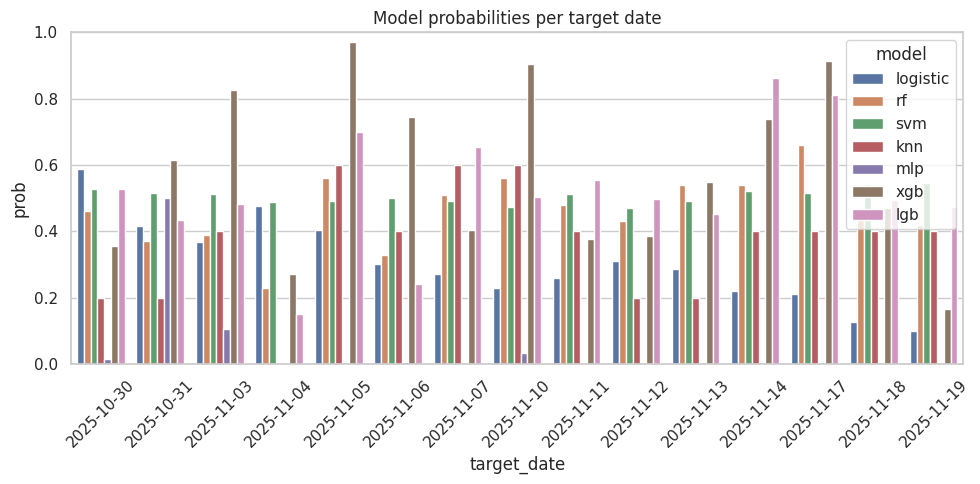

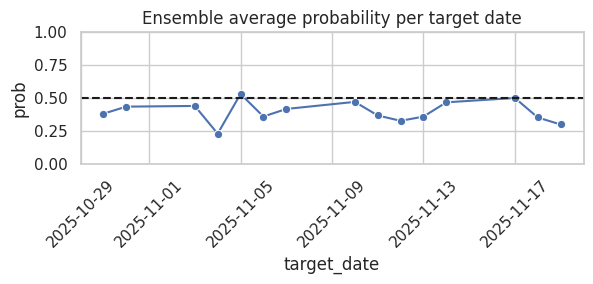


No copy_trade_report.txt found in figures/
No candle image for 2025 (expected figures/candles_2025.png)


In [4]:
# Plot model probabilities, ensemble and candles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Image

sns.set(style='whitegrid')

# try figures path first
p = Path('figures/trade_ready_signals.csv')
if not p.exists():
    p = Path('trade_ready_signals.csv')
if not p.exists():
    raise FileNotFoundError(f"Could not find trade_ready_signals.csv in figures/ or repo root")

df = pd.read_csv(p, parse_dates=['as_of_date','target_date'])

display(df.head())

# pivot and plot per-model probabilities per target_date
plt.figure(figsize=(10,5))
try:
    sns.barplot(data=df, x='target_date', y='prob', hue='model')
    plt.title('Model probabilities per target date')
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Barplot failed:', e)

# ensemble average per target_date
ens = df.groupby('target_date')['prob'].mean().reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=ens, x='target_date', y='prob', marker='o')
plt.title('Ensemble average probability per target date')
plt.ylim(0,1)
plt.axhline(0.5, color='k', ls='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print copy-trade report if present
report = Path('figures/copy_trade_report.txt')
if report.exists():
    print('\nCopy-trade report (first 200 lines):\n')
    print('\n'.join(report.read_text().splitlines()[:200]))
else:
    print('\nNo copy_trade_report.txt found in figures/')

# show yearly candle PNGs for the target years
years = sorted(pd.DatetimeIndex(df['target_date']).year.unique())
for y in years:
    img = Path(f'figures/candles_{y}.png')
    if img.exists():
        print(f'--- {y} ---')
        display(Image(filename=str(img)))
    else:
        print(f'No candle image for {y} (expected {img})')


,target_date,action,mean_prob,count,mean_size
0,2025-10-30,BUY,0.586833,1,100.0
1,2025-10-30,HOLD,0.505568,3,100.0
2,2025-10-30,SELL,0.190503,3,100.0
3,2025-10-31,BUY,0.615914,1,100.0
4,2025-10-31,HOLD,0.507647,2,100.0
5,2025-10-31,SELL,0.355028,4,100.0
6,2025-11-03,BUY,0.826545,1,100.0
7,2025-11-03,HOLD,0.498607,2,100.0
8,2025-11-03,SELL,0.316100,4,100.0
9,2025-11-04,HOLD,0.481547,2,100.0


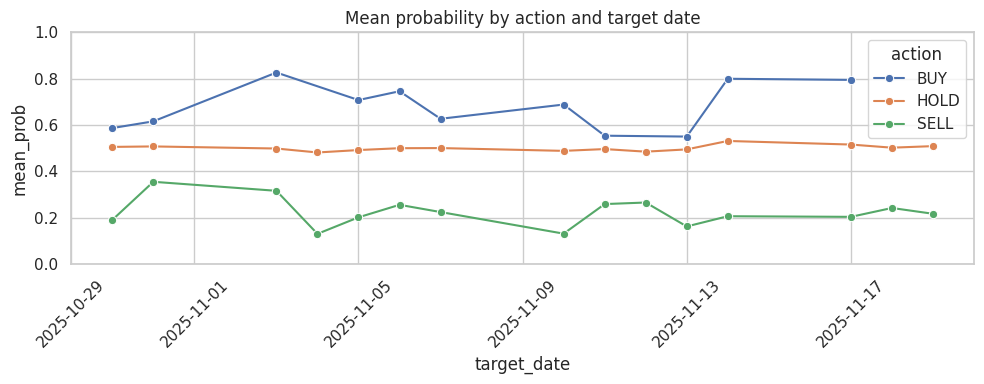

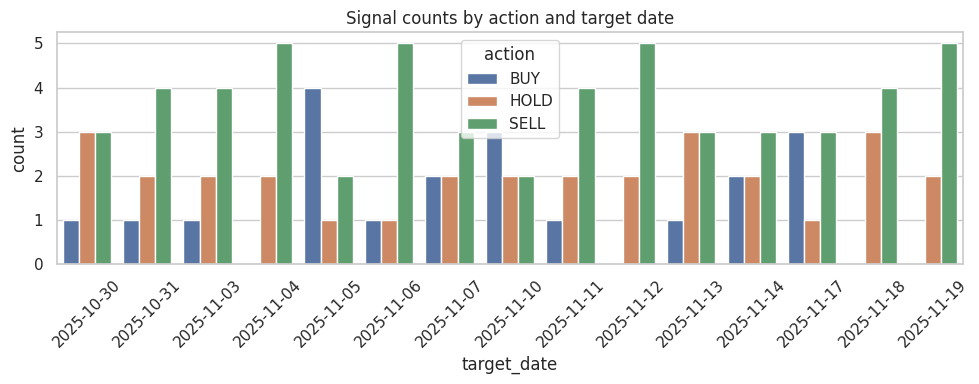

In [5]:
# Aggregate by target_date and action, then plot mean probability and counts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

p = Path('figures/trade_ready_signals.csv')
if not p.exists():
    p = Path('trade_ready_signals.csv')
if not p.exists():
    raise FileNotFoundError('trade_ready_signals.csv not found in figures/ or repo root')

# read with parsed dates
df = pd.read_csv(p, parse_dates=['as_of_date','target_date'])

if 'action' not in df.columns:
    print('No "action" column in signals; ensure trade_ready_signals.csv includes action (BUY/SELL/HOLD).')
else:
    # ensure suggested_size exists so aggregation won't KeyError
    if 'suggested_size' not in df.columns:
        df['suggested_size'] = pd.NA

    agg = df.groupby(['target_date','action']).agg(
        mean_prob=('prob','mean'),
        count=('prob','count'),
        mean_size=('suggested_size','mean')
    ).reset_index()

    display(agg.head(20))

    # Line plot: mean probability by action across dates
    plt.figure(figsize=(10,4))
    sns.lineplot(data=agg, x='target_date', y='mean_prob', hue='action', marker='o')
    plt.title('Mean probability by action and target date')
    plt.ylim(0,1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bar plot: counts per action per date (stacked-like via hue)
    plt.figure(figsize=(10,4))
    sns.barplot(data=agg, x='target_date', y='count', hue='action')
    plt.title('Signal counts by action and target date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
